In [76]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import tensorflow as tf
from keras.layers import Dense, Activation, Input, Dropout
from keras import Sequential

from sklearn.model_selection import train_test_split as tts, StratifiedKFold as skf

from sklearn.impute import SimpleImputer

from utils import format_ppm_x

In [77]:
num_prev_vals = 3

In [83]:
data = format_ppm_x(pd.read_csv('../data/ppm.csv'), num_prev_vals)

X = data.iloc[:, data.columns != 0]

X = X.replace(-99.99, None)

Y = data[0]

checkpoint 1


In [90]:
data.head()

,3,2,1,0
0,315.98,316.91,317.64,318.45
1,316.91,317.64,318.45,318.99
2,317.64,318.45,318.99,319.62
3,318.45,318.99,319.62,320.04
4,318.99,319.62,320.04,321.37


In [84]:
X.head()

,3,2,1
0,315.98,316.91,317.64
1,316.91,317.64,318.45
2,317.64,318.45,318.99
3,318.45,318.99,319.62
4,318.99,319.62,320.04


In [85]:
imputer = SimpleImputer()

X = pd.DataFrame(imputer.fit_transform(X))

In [88]:
optimizer = tf.keras.optimizers.Adagrad(
    learning_rate=0.01,
    initial_accumulator_value=0.4
)

In [91]:
model = Sequential(
    [
        # Input(shape=(47,)),
        Dense(units=4096, activation='relu', input_shape=(num_prev_vals,)),
        # Dense(units=4096, activation='relu'),
        Dense(units=2048, activation='relu'),
        Dense(units=1024, activation='relu'),
        Dense(units=512, activation='relu'),
        Dense(units=256, activation='relu'),
        Dense(units=128, activation='relu'),
        Dense(units=64, activation='relu'),
        Dense(units=32, activation='relu'),
        Dense(units=16, activation='relu'),
        Dense(units=8, activation='relu'),
        Dense(units=4, activation='relu'),
        Dense(units=1, activation='relu'),
    ]
)

model.compile(optimizer=optimizer, loss='mae', metrics=['mse'])
X_train, X_test, Y_train, Y_test = tts(X, Y)

history = model.fit(
    x=X_train,
    y=Y_train,
    validation_data=(X_test, Y_test),
    batch_size=5,
    epochs=150
)

Epoch 1/150
9/9 [==============================] - 1s 85ms/step - loss: 1082.0447 - mse: 4475956.5000 - val_loss: 235.9331 - val_mse: 55893.9844
Epoch 2/150
9/9 [==============================] - 1s 63ms/step - loss: 407.2679 - mse: 242105.9062 - val_loss: 274.8637 - val_mse: 75857.8828
Epoch 3/150
9/9 [==============================] - 1s 66ms/step - loss: 268.7943 - mse: 119955.7812 - val_loss: 150.5011 - val_mse: 22748.8145
Epoch 4/150
9/9 [==============================] - 1s 67ms/step - loss: 148.5218 - mse: 33894.1719 - val_loss: 132.0677 - val_mse: 17519.0312
Epoch 5/150
9/9 [==============================] - 1s 65ms/step - loss: 115.5451 - mse: 19556.7734 - val_loss: 6.9678 - val_mse: 48.8771
Epoch 6/150
9/9 [==============================] - 1s 66ms/step - loss: 83.8508 - mse: 9495.8203 - val_loss: 110.5861 - val_mse: 12285.0791
Epoch 7/150
9/9 [==============================] - 1s 66ms/step - loss: 90.2055 - mse: 10930.0439 - val_loss: 20.1984 - val_mse: 408.5905
Epoch 8/150


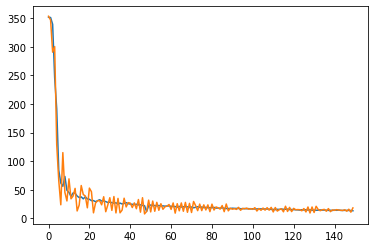

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [95]:
print(min(val_loss:= history.history['val_mse']))

0.8211086988449097


In [111]:
predictions = []
for i, val in data.iterrows():
    print()
    predictions.append(model.predict(np.array(val[:-1]).reshape(1,3)))



1/1 [==============================] - 0s 160ms/step

1/1 [==============================] - 0s 25ms/step

1/1 [==============================] - 0s 24ms/step

1/1 [==============================] - 0s 25ms/step

1/1 [==============================] - 0s 23ms/step

1/1 [==============================] - 0s 24ms/step

1/1 [==============================] - 0s 23ms/step

1/1 [==============================] - 0s 24ms/step

1/1 [==============================] - 0s 24ms/step

1/1 [==============================] - 0s 24ms/step

1/1 [==============================] - 0s 23ms/step

1/1 [==============================] - 0s 24ms/step

1/1 [==============================] - 0s 23ms/step

1/1 [==============================] - 0s 23ms/step

1/1 [==============================] - 0s 23ms/step

1/1 [==============================] - 0s 23ms/step

1/1 [==============================] - 0s 24ms/step

1/1 [==============================] - 0s 23ms/step

1/1 [==============================] - 0s 24

In [117]:
predictions = np.array(predictions).reshape(len(predictions))

In [128]:
Y[0] - predictions[0]

13.402209472656239

318.45

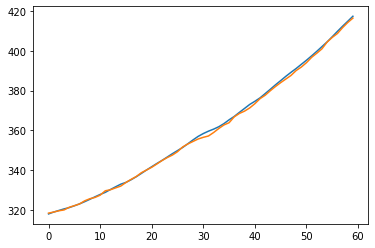

In [152]:
plt.plot([i + 13+ind/7 for ind, i in enumerate(predictions)])
plt.plot(Y)